In [ ]:
import opendatasets as od
import pandas as pd

# Acá descargo la base de datos. Es de la performance de alumnos según distintas características
od.download("https://raw.githubusercontent.com/Coolfede97/Tecnologias_Exponenciales_2025/refs/heads/main/Seminario/datos/student_performance.csv")

dt_base = pd.read_csv("https://raw.githubusercontent.com/Coolfede97/Tecnologias_Exponenciales_2025/refs/heads/main/Seminario/datos/student_performance.csv")
dt_base.head()

# El target de esta base de datos es el FinalGrade, que se va a convertir en sobresaliente (1) la nota es >= 90 y no sobresaliente (0) si la nota es < 90

Using downloaded and verified file: .\student_performance.csv


,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,OutstandingFinalMark,Study Hours,Attendance (%),Online Classes Taken
0,1.0,John,Male,85.0,15.0,78.0,1.0,High,80.0,4.8,59.0,False
1,2.0,Sarah,Female,90.0,20.0,85.0,2.0,Medium,87.0,2.2,70.0,True
2,3.0,Alex,Male,78.0,10.0,65.0,0.0,Low,68.0,4.6,92.0,False
3,4.0,Michael,Male,92.0,25.0,90.0,3.0,High,92.0,2.9,96.0,False
4,5.0,Emma,Female,NaN,18.0,82.0,2.0,Medium,85.0,4.1,97.0,True


In [ ]:
# No debe correrse más de una vez, a ser que se corra con Run All. Acá cambio el nombre de la columna FinalMark porque será convertido en clasficación binaria
ofm = 'OutstandingFinalMark'
dt_base = dt_base.rename(columns={'FinalMark ': ofm})
dt_base.head()

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,OutstandingFinalMark,Study Hours,Attendance (%),Online Classes Taken
0,1.0,John,Male,85.0,15.0,78.0,1.0,High,80.0,4.8,59.0,False
1,2.0,Sarah,Female,90.0,20.0,85.0,2.0,Medium,87.0,2.2,70.0,True
2,3.0,Alex,Male,78.0,10.0,65.0,0.0,Low,68.0,4.6,92.0,False
3,4.0,Michael,Male,92.0,25.0,90.0,3.0,High,92.0,2.9,96.0,False
4,5.0,Emma,Female,NaN,18.0,82.0,2.0,Medium,85.0,4.1,97.0,True


In [ ]:
# La línea de abajo convierte todos los valores a valores numéricos 
dt_base[ofm] = pd.to_numeric(dt_base[ofm], errors='coerce')

# Saco las columnas StudentID y Name porque no aportan información relevante para el análisis
# También saco Study Hours y Attendance (%) porque son columnas muy similares a StudyHoursPerWeek y AttendanceRate
dt_base.drop(columns=['StudentID', 'Name', 'Study Hours', 'Attendance (%)'], inplace=True)
# Saco las filas con algún valor que sea NaN
dt_base = dt_base.dropna()
# Si hay valores negativos (hay algunas filas con finalGrade < 0), los saca
dt_base = dt_base[(dt_base[ofm] >= 0)]
# Si hay valores que exceden su límite (hay algunas filas con finalGrade < 0), los saca
dt_base = dt_base[dt_base['AttendanceRate'] <= 100]

# Convierte el porcentaje de la nota a 0 o 1 dependiendo de si la nota es >= 90 o < 90 (nota sobresaliente y no sobresaliente respectivamente)
dt_base[ofm] = (dt_base[ofm] >= 90).astype(int) 
dt_base.head()

# Convierte los datos categóricos a numéricos para poder usarlos para entrenar
dt_base['ParentalSupport'] = dt_base['ParentalSupport'].astype('category').cat.codes
dt_base['Gender'] = dt_base['Gender'].astype('category').cat.codes
dt_base['Online Classes Taken'] = dt_base['Online Classes Taken'].astype('category').cat.codes


In [293]:
dt_base.head()


,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,OutstandingFinalMark,Online Classes Taken
0,1,85.0,15.0,78.0,1.0,0,0,0
1,0,90.0,20.0,85.0,2.0,2,0,1
2,1,78.0,10.0,65.0,0.0,1,0,0
3,1,92.0,25.0,90.0,3.0,0,1,0
5,0,95.0,30.0,88.0,1.0,0,0,0


In [294]:
dt_base.head()
dt_base.info()
dt_base.describe()
dt_base.isnull().sum()
dt_base.columns

<class 'pandas.core.frame.DataFrame'>
Index: 771 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     771 non-null    int8   
 1   AttendanceRate             771 non-null    float64
 2   StudyHoursPerWeek          771 non-null    float64
 3   PreviousGrade              771 non-null    float64
 4   ExtracurricularActivities  771 non-null    float64
 5   ParentalSupport            771 non-null    int8   
 6   OutstandingFinalMark       771 non-null    int32  
 7   Online Classes Taken       771 non-null    int8   
dtypes: float64(4), int32(1), int8(3)
memory usage: 35.4 KB


Index(['Gender', 'AttendanceRate', 'StudyHoursPerWeek', 'PreviousGrade',
       'ExtracurricularActivities', 'ParentalSupport', 'OutstandingFinalMark',
       'Online Classes Taken'],
      dtype='object')

Explicación de columnas:

StudentID: Es el identificador único de cada estudiante

Name: El nombre del estudiante

Gender: El género del estudiante (Male - Female)

AttendanceRate: Porcentaje de clases a las que asistió asistidas el estudiante

StudyHoursPerWeek: Horas invertidas en estudiar a la semana 

PreviousGrade: Nota final del semestre pasado

ExtracurricularActivities: Número de actividades extracurriculares
ParentalSupport: El nivel de apoyo por parte de los padres (bajo - medio- alto)

OnlineClassesTaken: Si el estudiante tomó clases virtuales 

OutstandingFinalGrade: 1 si antes de la conversión FinalGrade era  >= 90, 0 si FinalGrade <90 

In [ ]:
# El target es la columna OutstandingFinalMark, si la nota es sobresaliente (1) o no (0)
Y = dt_base[ofm];

In [ ]:
# Se importan todas las librerías necesarias
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


In [ ]:
# Logistic Regression solo con atributos numéricos continuos

# El X que se va a usar para entrenar y testear el modelo es la base de datos sin la columna del target (ofm) y sin las columnas categóricas
X_continuous = dt_base.drop(columns=[ofm, 'Gender', 'ParentalSupport', 'Online Classes Taken'])

# Separo en train y test
x_train, x_test, y_train, y_test = train_test_split(X_continuous, Y, test_size=0.2, random_state=42)

# Preparo los hiperparámetros que voy a testear en el GridSearch
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],                
    'penalty': ['l1', 'l2'],                     
    'solver': ['liblinear', 'saga'],          
    'max_iter': [300, 500, 1000]                 
}

# Creo el grid search con cross validation de 5 folds
grid_search = GridSearchCV(
    estimator=LogisticRegression(class_weight='balanced'),
    param_grid=param_grid,
    scoring='accuracy',                          
    cv=5,                                        
    verbose=1,
    n_jobs=-1                                    
)

# Entreno los distintos modelos con los distintos hiperparámetros
grid_search.fit(x_train, y_train)

# Me quedo con el mejor modelo de Logistic Regression
model_lr = grid_search.best_estimator_

# Predigo con el mejor modelo
pred_lr = model_lr.predict(x_test)

# Muestro la accuracy, precision, recall y la matriz de confusión
print("Accuracy:", accuracy_score(y_test, pred_lr))
print("Precision:", precision_score(y_test, pred_lr))
print("Recall:", recall_score(y_test, pred_lr))

print(confusion_matrix(y_test, pred_lr))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Accuracy: 0.6387096774193548
Precision: 0.2857142857142857
Recall: 0.5
[[83 40]
 [16 16]]


Accuracy: 0.5096774193548387
Precision: 0.21052631578947367
Recall: 0.5
[[63 60]
 [16 16]]


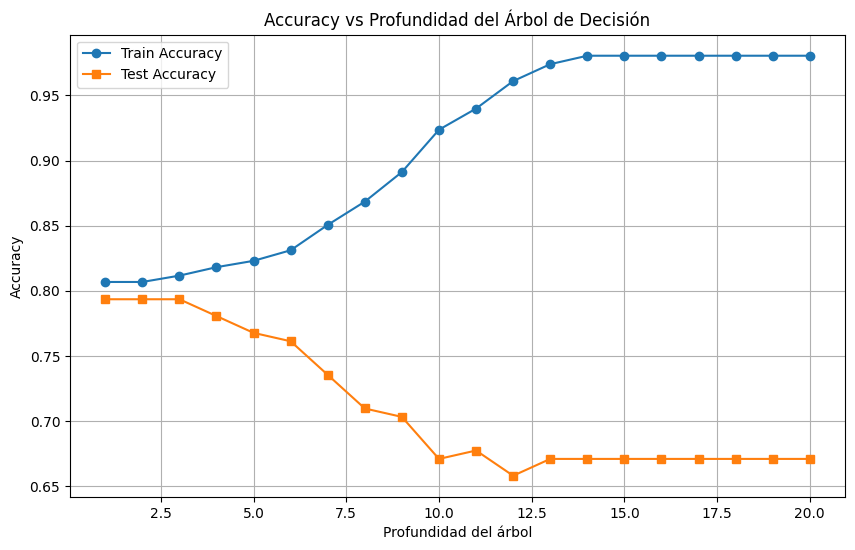

In [ ]:
# Decision Tree clasifier solo con atributos numéricos continuos

X_continuous = dt_base.drop(columns=[ofm, 'Gender', 'ParentalSupport', 'Online Classes Taken'])
x_train, x_test, y_train, y_test = train_test_split(X_continuous, Y, test_size=0.2, random_state=42)

param_grid = {         
    'max_depth': [10, 20, 50, 100],
    'min_samples_leaf': [1, 2, 4],             
}

# En este caso no uso grid search porque lo voy a usar en el siguiente que sí utiliza los atributos categóricos
# Creo el modelo DecisionTreeClassifier
model_tsc = DecisionTreeClassifier(max_depth=5, class_weight='balanced')

model_tsc.fit(x_train, y_train)

pred_lr = model_tsc.predict(x_test)

print("Accuracy:", accuracy_score(y_test, pred_lr))
print("Precision:", precision_score(y_test, pred_lr))
print("Recall:", recall_score(y_test, pred_lr))

print(confusion_matrix(y_test, pred_lr))

# El rango de depths que voy a probar para después graficar accuracy vs depth
depths = range(1, 21)

train_accuracies = []
test_accuracies = []

# Creo un modelo por cada depth y veo como le va, después veo su accuracy y el depth que se utilizó para entrenarlo
for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(x_train, y_train)

    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    train_accuracies.append(accuracy_score(y_train, train_pred))
    test_accuracies.append(accuracy_score(y_test, test_pred))

# Funciones de matplot para graficar accuracy vs depth y que se vea fachero
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(depths, test_accuracies, label='Test Accuracy', marker='s')
plt.xlabel('Profundidad del árbol')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Profundidad del Árbol de Decisión')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Logistic Regression con atributos numéricos continuos y categóricos

# El X que se va a usar para entrenar y testear el modelo es la base de datos sin la columna del target (ofm) pero con las columnas categóricas
X = dt_base.drop(columns=[ofm])
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],                
    'penalty': ['l1', 'l2'],                     
    'solver': ['liblinear', 'saga'],          
    'max_iter': [300, 500, 1000]                 
}

grid_search = GridSearchCV(
    estimator=LogisticRegression(class_weight='balanced'),
    param_grid=param_grid,
    scoring='accuracy',                          
    cv=5,                                        
    verbose=1,
    n_jobs=-1                                    
)

grid_search.fit(x_train, y_train)

model_lr = grid_search.best_estimator_

pred_lr = model_lr.predict(x_test)

print("Accuracy:", accuracy_score(y_test, pred_lr))
print("Precision:", precision_score(y_test, pred_lr))
print("Recall:", recall_score(y_test, pred_lr))

print(confusion_matrix(y_test, pred_lr))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Accuracy: 0.6258064516129033
Precision: 0.27586206896551724
Recall: 0.5
[[81 42]
 [16 16]]


c:\Users\Compumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Accuracy: 0.6774193548387096
Precision: 0.21875
Recall: 0.21875
[[98 25]
 [25  7]]


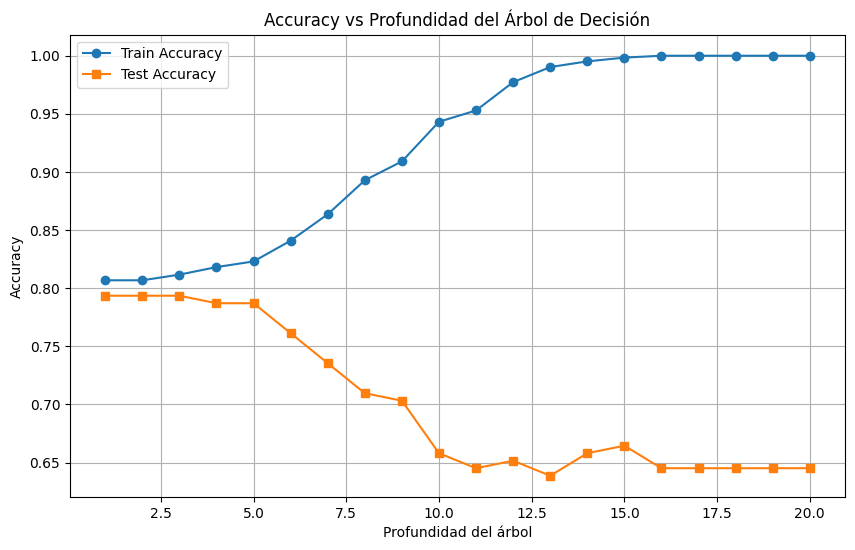

In [300]:
# Decision Tree clasifier con atributos numéricos continuos y categóricos con búsqueda de hiperparámetros
X = dt_base.drop(columns=[ofm])
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

param_grid = {         
    'max_depth': [2, 3, 10, 20, 50, 100],
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(class_weight='balanced'),
    param_grid=param_grid,
    scoring='accuracy',                          
    cv=5,                                        
    verbose=1,
    n_jobs=-1                                    
)

grid_search.fit(x_train, y_train)

model_lr = grid_search.best_estimator_

pred_lr = model_lr.predict(x_test)

print("Accuracy:", accuracy_score(y_test, pred_lr))
print("Precision:", precision_score(y_test, pred_lr))
print("Recall:", recall_score(y_test, pred_lr))

print(confusion_matrix(y_test, pred_lr))

depths = range(1, 21)

train_accuracies = []
test_accuracies = []

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(x_train, y_train)

    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    train_accuracies.append(accuracy_score(y_train, train_pred))
    test_accuracies.append(accuracy_score(y_test, test_pred))

plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(depths, test_accuracies, label='Test Accuracy', marker='s')
plt.xlabel('Profundidad del árbol')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Profundidad del Árbol de Decisión')
plt.legend()
plt.grid(True)
plt.show()
